## 0. imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

jak sie nazywa 3. etap?
trzba by było zmienić nazwę pliku i folderu

## 1. wczytanie danych

In [2]:
import pandas as pd
data_pca = pd.read_csv('../data/our_data_pca.csv')
data = pd.read_csv('../data/our_data.csv')

## 2. Model `kmeans`  
dla dwóch klastrów (jak wynika z poprzedniego etapu)

In [3]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(data_pca)
data['cluster'] = kmeans.labels_

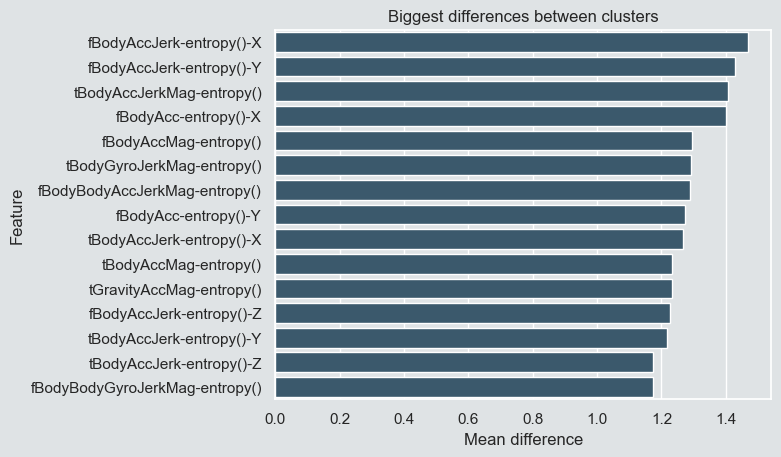

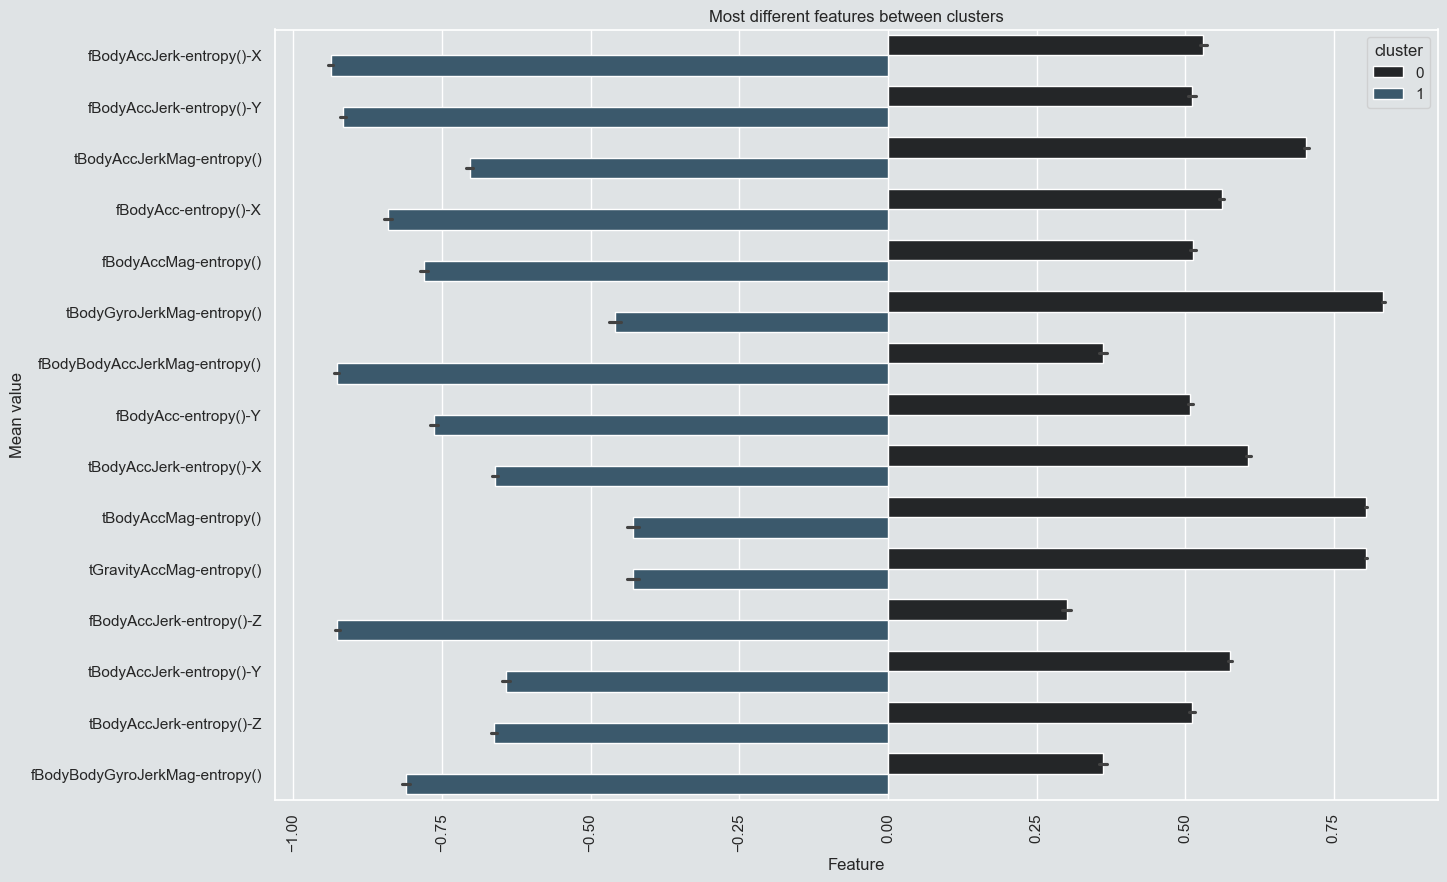

In [17]:
cluster_0 = data[data['cluster'] == 0]
cluster_1 = data[data['cluster'] == 1]

#differences between clusters
difference = abs(cluster_0.mean() - cluster_1.mean())
difference = difference.sort_values(ascending=False)
difference = pd.DataFrame(difference)
difference.columns = ['cluster_0 - cluster_1']
first_15 = difference.head(15)

sns.set_theme(rc={'axes.facecolor':'#DFE3E5', 'figure.facecolor':'#DFE3E5'})
sns.barplot(x = first_15 ['cluster_0 - cluster_1'], y = first_15.index, color='#335B74')
plt.title('Biggest differences between clusters')
plt.ylabel('Feature')
plt.xlabel('Mean difference')
plt.show()

plotdata = data[first_15.index]
plotdata['cluster'] = data['cluster']
plotdata = pd.melt(plotdata, id_vars='cluster')

sns.barplot(x='value', y='variable', hue='cluster', data=plotdata, color='#335B74')
plt.xticks(rotation=90)
plt.title('Most different features between clusters')
plt.ylabel('Mean value')
plt.xlabel('Feature')
fig = plt.gcf()
fig.set_size_inches(15, 10)
fig.show()



jerk - maksymalna różnica w prędkości po zadanej osi w punkcie  
acc - przyspieszenie  
nasz model głównie po tym rozróznia, zapewne czynności wolne, statyczne vs. dynamiczne

# 3. Test 6 klastrów

Ramka początkowa klasyfikuje każdą z obserwacji do jednego z sześciu klas. Sprawdźmy jak nasz model radzi sobie z liczbą klastrów równą 6.

In [9]:
kmeans_6 = KMeans(n_clusters=6, random_state=42)
kmeans_6.fit(data_pca)

KMeans(n_clusters=6, random_state=42)

In [40]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

def compare_kmeans(kmeans, kmeans_6, data):
    results = []
    
    results.append((kmeans.score(data)*-1, kmeans_6.score(data)*-1))
    
    
    scores = [silhouette_score, calinski_harabasz_score, davies_bouldin_score]
    
    labels = kmeans.predict(data)
    labels_6 = kmeans_6.predict(data)
    for score in scores:
        results.append((score(data, labels), score(data, labels_6)))
        
    labels = ["wcss", "Silhouette Score", "Calinski-Harabasz Score", "Davies-Bouldin Score"]
    
    figure, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes = axes.flatten()
    
    for i, score in enumerate(results):
        sns.barplot(x=["kmeans", "kmeans_6"], y=list(score), ax= axes[i])
        axes[i].set_title(labels[i])
        axes[i].set_ylabel('Score')
    
    plt.tight_layout()
    plt.show()

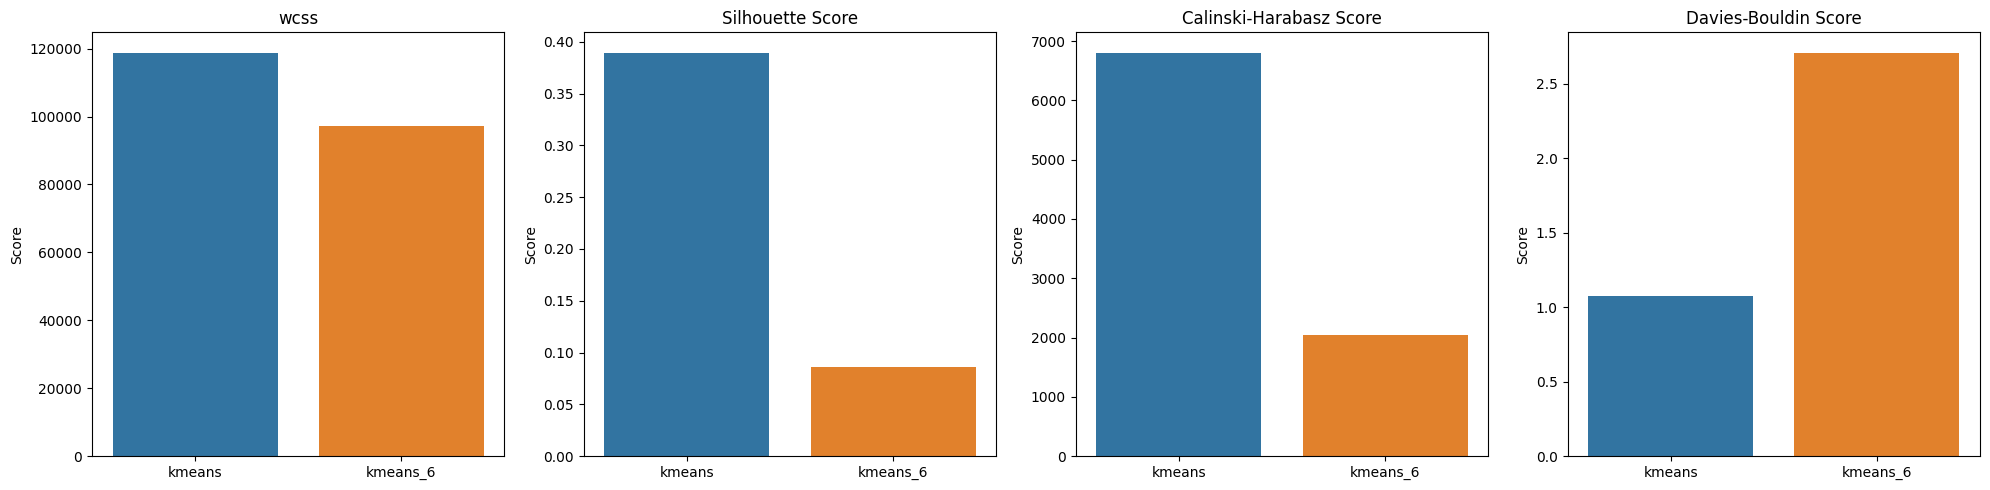

In [41]:
compare_kmeans(kmeans, kmeans_6, data_pca)

In [44]:
from sklearn.manifold import TSNE

tSNE = TSNE(random_state=42, verbose=1)
data_tsne = tSNE.fit_transform(data_pca)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8239 samples in 0.004s...
[t-SNE] Computed neighbors for 8239 samples in 0.355s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8239
[t-SNE] Computed conditional probabilities for sample 2000 / 8239
[t-SNE] Computed conditional probabilities for sample 3000 / 8239
[t-SNE] Computed conditional probabilities for sample 4000 / 8239
[t-SNE] Computed conditional probabilities for sample 5000 / 8239
[t-SNE] Computed conditional probabilities for sample 6000 / 8239
[t-SNE] Computed conditional probabilities for sample 7000 / 8239
[t-SNE] Computed conditional probabilities for sample 8000 / 8239
[t-SNE] Computed conditional probabilities for sample 8239 / 8239
[t-SNE] Mean sigma: 1.116745
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.730721
[t-SNE] KL divergence after 1000 iterations: 1.675514


In [48]:
labels = kmeans.predict(data_pca)
labels_6 = kmeans_6.predict(data_pca)

In [54]:
def compare_scatter(data, labels):
    figure, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes = axes.flatten()
    
    for i, label in enumerate(labels):
        sns.scatterplot(x=data[:,0], y=data[:,1], hue=label, ax=axes[i], legend=False, palette=sns.color_palette("muted"))
        axes[i].axis('off')
        
    plt.tight_layout()
    plt.show()

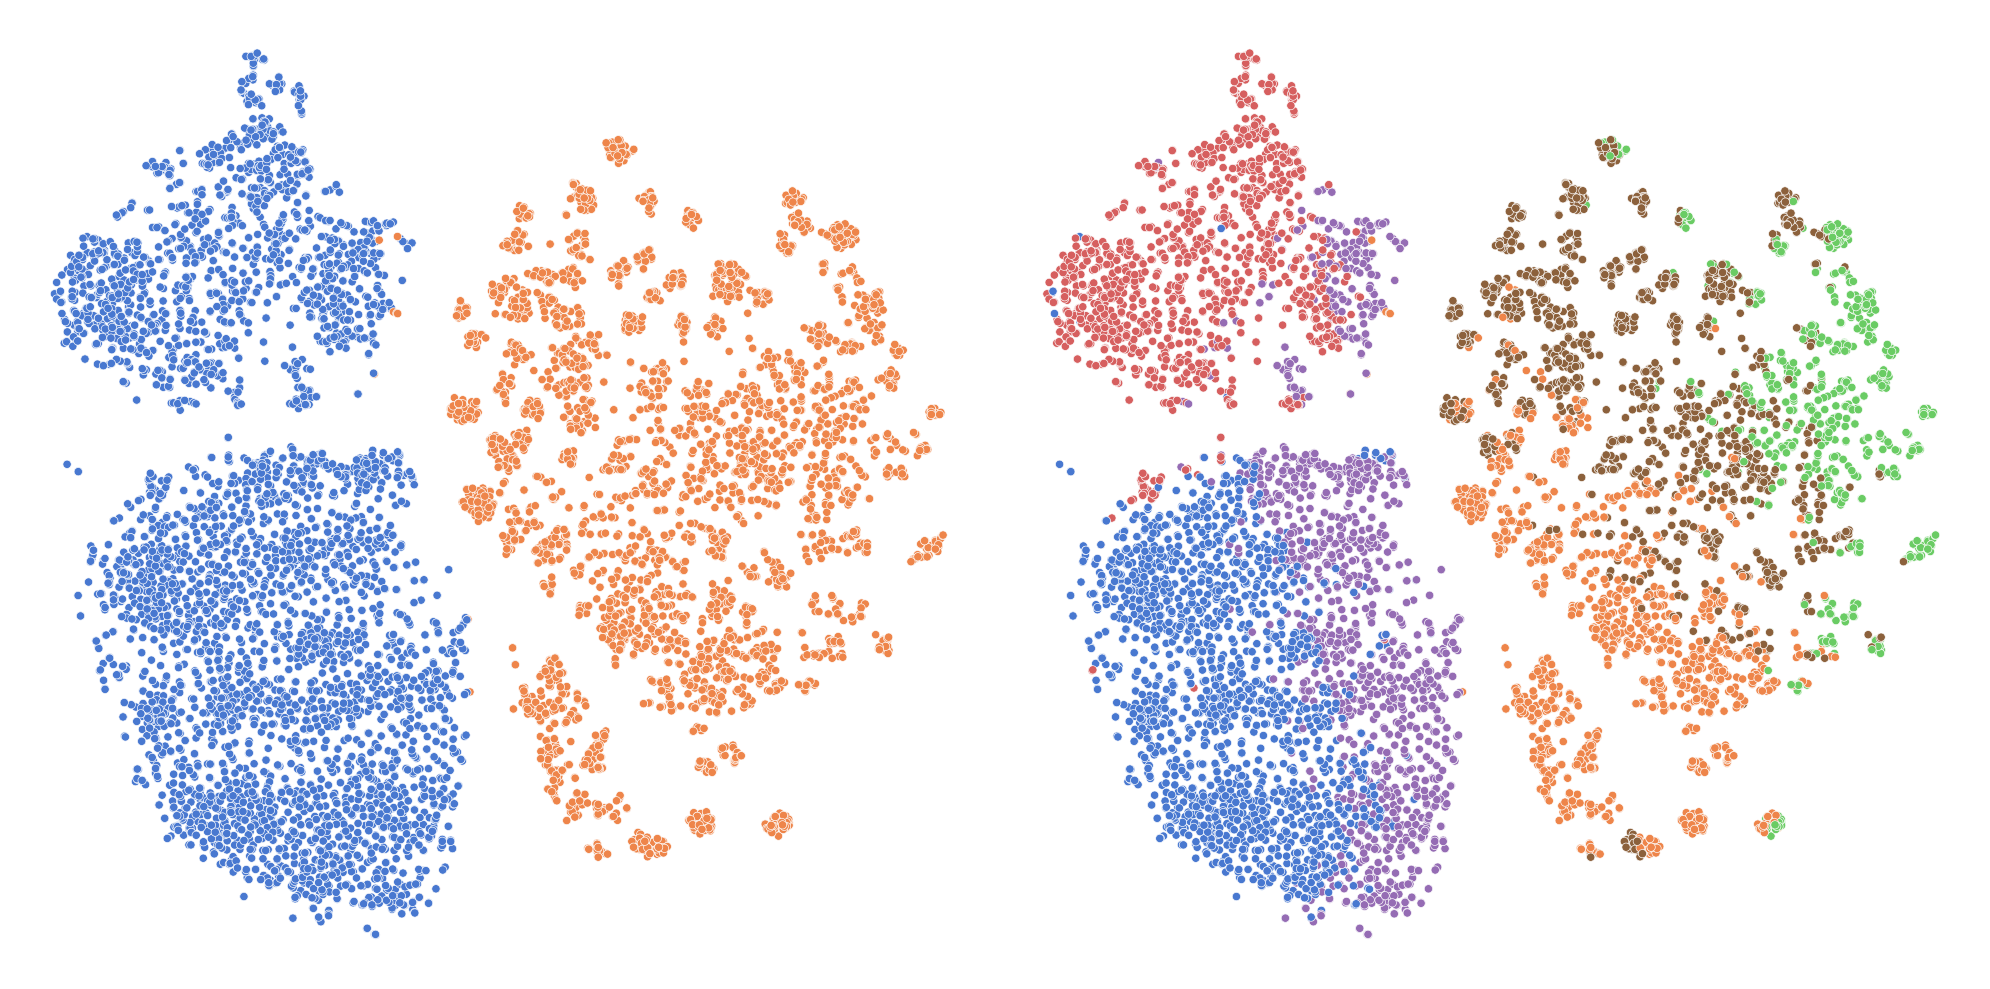

In [57]:
compare_scatter(data_tsne, [labels, labels_6])

Dzieli oba z początkowych klastrów na 3 mniejsze.